In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from investigation_functions import ml_visualisation_funcs as mvf

In [2]:
dirr='../ML_results/with_refr_H/'
file_ends = ['HSR_c1111.csv','HSR_fect.csv']
qubits = [4,8]
mls=['knn','svm']

dfs_svm_c1111 = []
dfs_knn_c1111 =[]
dfs_svm_fect =[]
dfs_knn_fect =[]
for qubit_nr in qubits:
    dfs_svm_c1111.append(
        pd.read_csv(dirr+"svm_"+str(qubit_nr)+"q_"+file_ends[0]))
    dfs_knn_c1111.append(
        pd.read_csv(dirr+"knn_"+str(qubit_nr)+"q_"+file_ends[0]))
    dfs_svm_fect.append(
        pd.read_csv(dirr+"svm_"+str(qubit_nr)+"q_"+file_ends[1]))
    dfs_knn_fect.append(
        pd.read_csv(dirr+"knn_"+str(qubit_nr)+"q_"+file_ends[1]))


select all test table runs

## HSR with all circuits (c111)

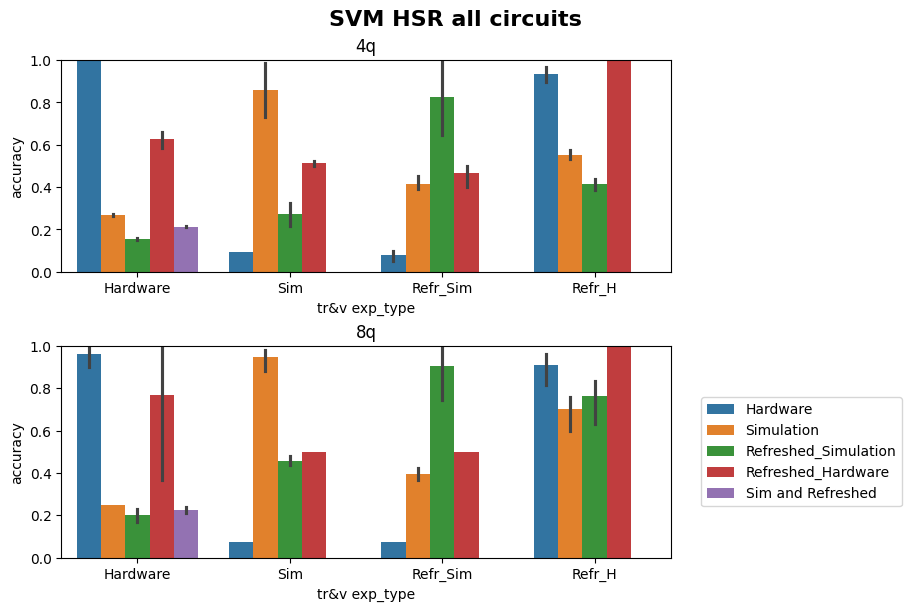

In [9]:
mvf.plot_bar_per_df(
    dfs_svm_c1111,
    title_="SVM HSR all circuits",
    labels_=['Hardware','Sim','Refr_Sim','Refr_H'],
    nr_cat = 4,
    x_ = 'tr&v exp_type',
    hue_ = 'test exp_type'
)

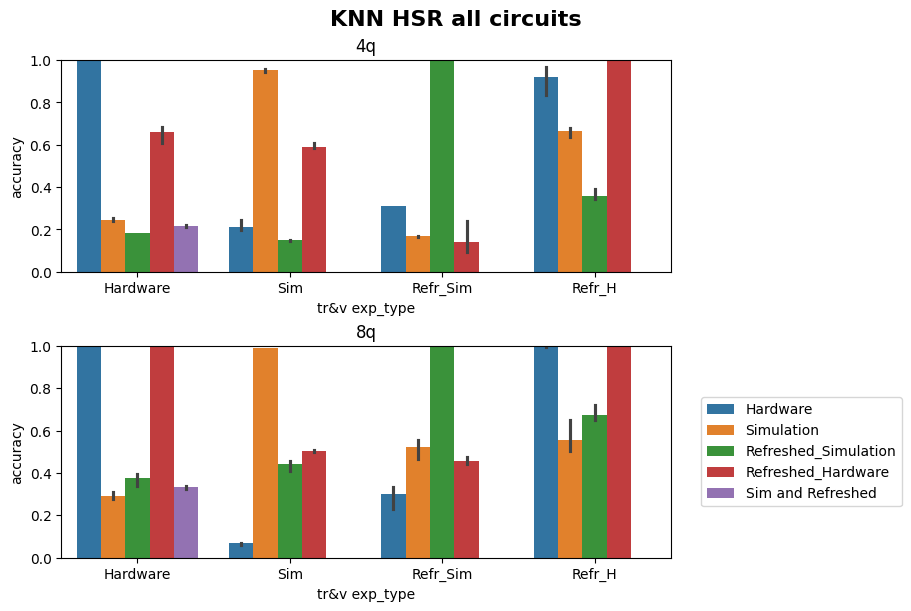

In [11]:
mvf.plot_bar_per_df(
    dfs_knn_c1111,
    title_="KNN HSR all circuits",
    labels_=['Hardware','Sim','Refr_Sim','Refr_H'],
    nr_cat = 4,
    x_ = 'tr&v exp_type',
    hue_ = 'test exp_type'
)

### Observations

When training and testing on different exp_types, accuracy is always below 50%.
-> Therefore noise profile is not comparable across different exp_types.
One thing to note is training on refreshed and testing on sim ~50% for 8 and 16 qubits.
Also, training on sim and testing on refreshed increases in accuracy as nr qubits increases.

Hardware accuracy is decreases with more qubits, others increase with more qubits

## HSR with c1

In [13]:
dfs_knn_c1 = mvf.apply_condition_to_dfs(dfs_knn_fect, 'tr&v circuits',100)
dfs_svm_c1 = mvf.apply_condition_to_dfs(dfs_svm_fect, 'tr&v circuits',100)

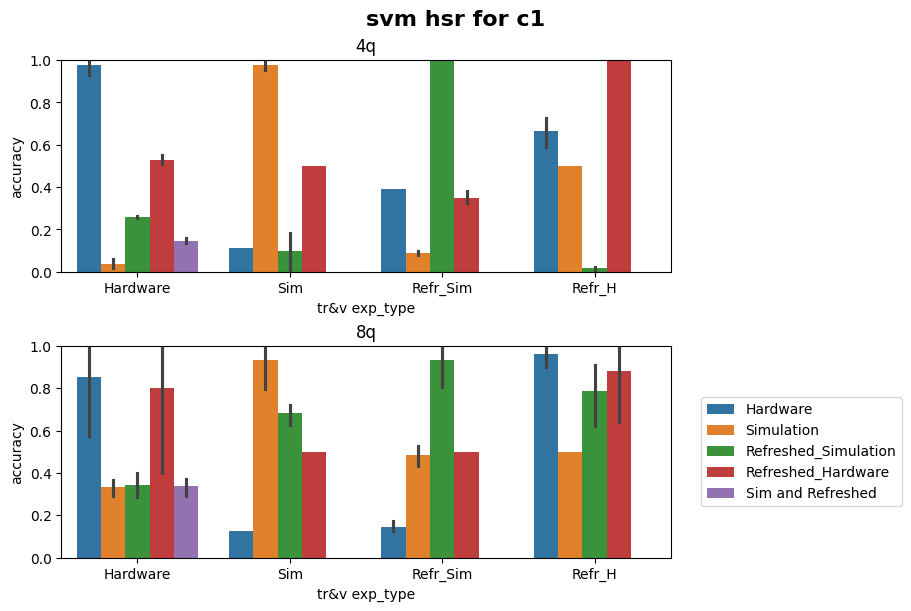

In [14]:
mvf.plot_bar_per_df(
    dfs_svm_c1,
    x_ = 'tr&v exp_type', y_ = 'accuracy',
    labels_=['Hardware','Sim','Refr_Sim','Refr_H'],
    hue_ = 'test exp_type', title_='svm hsr for c1', nr_cat =4
)

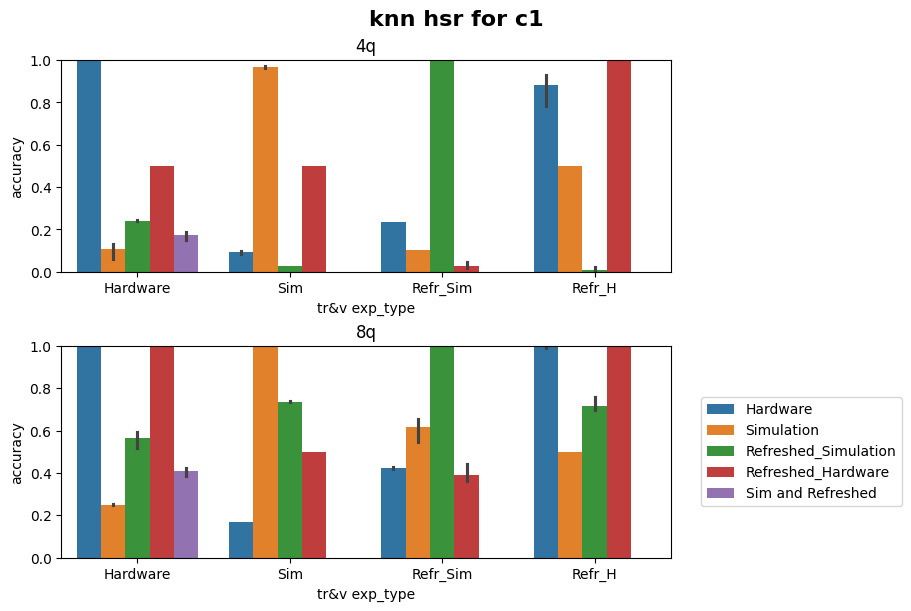

In [15]:
mvf.plot_bar_per_df(
    dfs_knn_c1,
    x_ = 'tr&v exp_type', y_ = 'accuracy',
    labels_=['Hardware','Sim','Refr_Sim','Refr_H'],
    hue_ = 'test exp_type', title_='knn hsr for c1', nr_cat =4
)

### Observations
all accuracies increase with more qubits. Also refreshed and sim have high cross-exp_type accuracy (hihest with 16q). Could show that c1 fingerprint is not so time-dependent...
*Need to check with new hardware runs


## HSR with c2

In [17]:
dfs_knn_c2 = mvf.apply_condition_to_dfs(dfs_knn_fect, 'tr&v circuits',10)
dfs_svm_c2 = mvf.apply_condition_to_dfs(dfs_svm_fect, 'tr&v circuits',10)

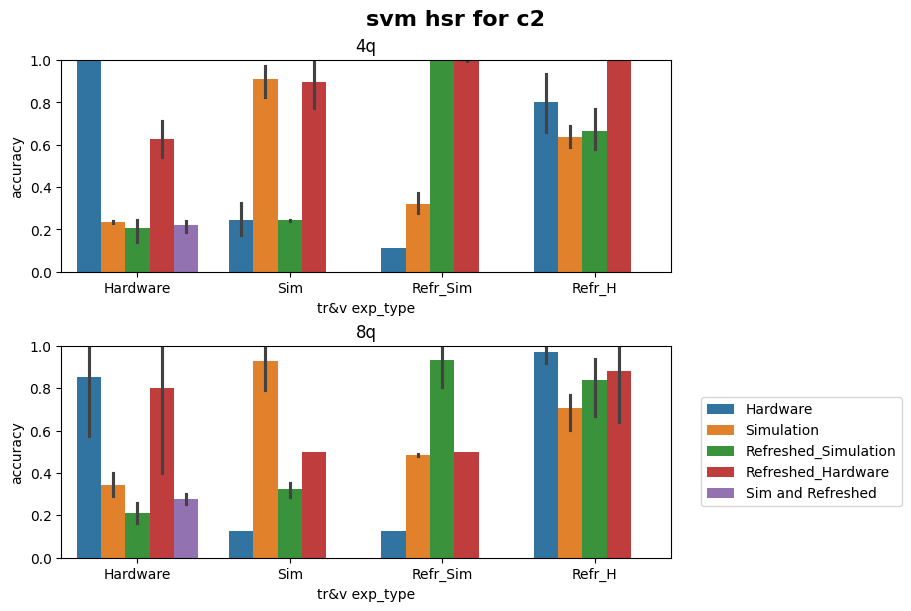

In [19]:
mvf.plot_bar_per_df(
    dfs_svm_c2,
    x_ = 'tr&v exp_type', y_ = 'accuracy',
    labels_=['Hardware','Sim','Refr_Sim','Refr_H'],
    hue_ = 'test exp_type', title_='svm hsr for c2', nr_cat =4
)

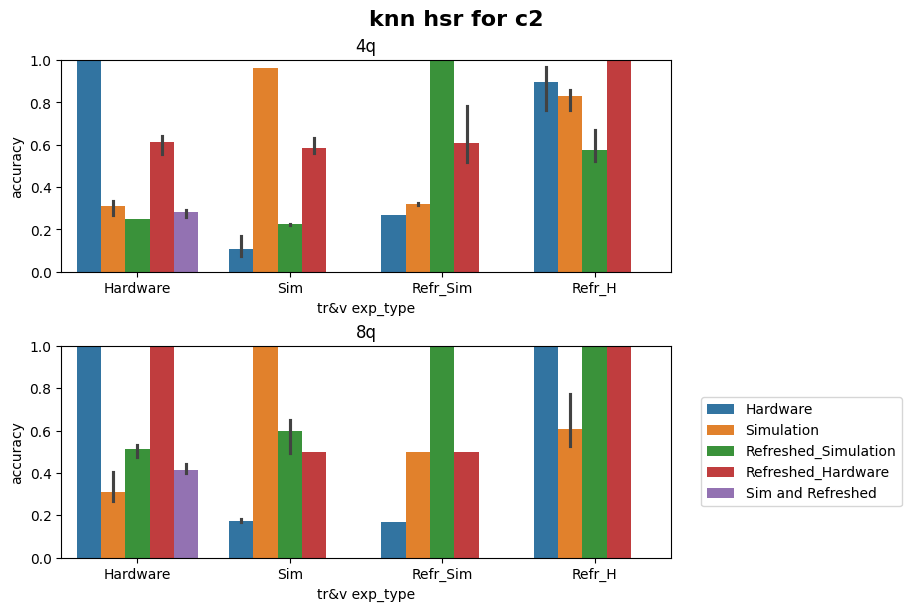

In [20]:
mvf.plot_bar_per_df(
    dfs_knn_c2,
    x_ = 'tr&v exp_type', y_ = 'accuracy',
    labels_=['Hardware','Sim','Refr_Sim','Refr_H'],
    hue_ = 'test exp_type', title_='knn hsr for c2', nr_cat =4
)

### Observations
self-accuracy increases with more qubits. cross-test with sim and refreshed also increases with more qubits, but is not as high as c1. Why? idk - might have to do with noise introduced by X gates being more time-dependent type of noise?

## HSR with c3

In [ ]:
dfs_knn_c3 = mvf.apply_condition_to_dfs(dfs_knn_fect, 'tr&v circuits',1)
dfs_svm_c3 = mvf.apply_condition_to_dfs(dfs_svm_fect, 'tr&v circuits',1)

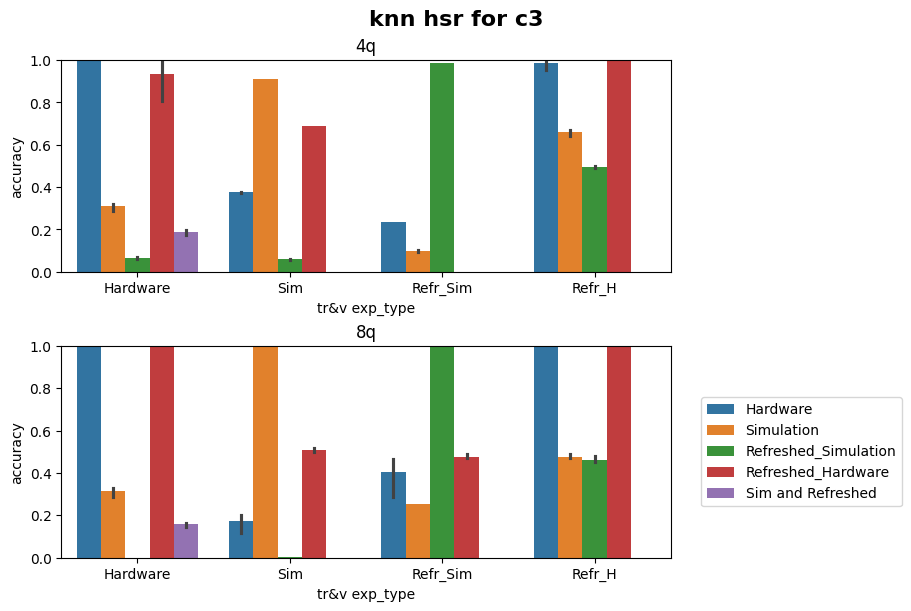

In [22]:
mvf.plot_bar_per_df(
    dfs_knn_c3,
    x_ = 'tr&v exp_type', y_ = 'accuracy',
    labels_=['Hardware','Sim','Refr_Sim','Refr_H'],
    hue_ = 'test exp_type', title_='knn hsr for c3', nr_cat =4
)

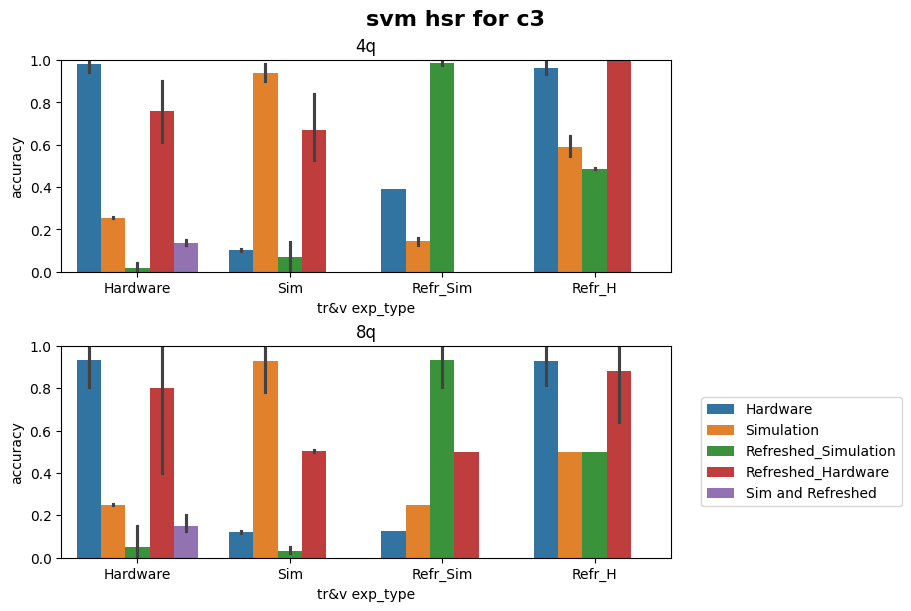

In [24]:
mvf.plot_bar_per_df(
    dfs_svm_c3,
    x_ = 'tr&v exp_type', y_ = 'accuracy',
    labels_=['Hardware','Sim','Refr_Sim','Refr_H'],
    hue_ = 'test exp_type', title_='svm hsr for c3', nr_cat =4
)

## Observations

Accuracy is generally lower, esp with hardware. Sim and refreshed improve to 100% with 16q but hardware is still ~80%. - this noise might not be closely enough related to the hardware itself. Might be more random?

All cross-exp type accuracies are ~<50%. This one might be good if you want to prevent spoofing